In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Importing Qiskit
from qiskit import transpile, assemble
from qiskit_aer import Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.visualization import plot_histogram, array_to_latex
#simple applying hadamard gate to 2 qubits
q=QuantumCircuit(2)
for qubit in range(2):
    q.h(qubit)
q.draw()

In [3]:
from qiskit import transpile, assemble
# hadamard on first bit, x gate on second (flip)
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
#using aer simulator to multiply the x gate and H gate 
#USEFUL FOR CREATING UNITARY OPERTATOR!!!!
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()

# Run the circuit on the unitary simulator backend
transpiled_qc = transpile(qc, usim)
job = usim.run(transpiled_qc)
result = job.result()

# Get the unitary matrix
unitary = result.get_unitary(transpiled_qc)

# To view results
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

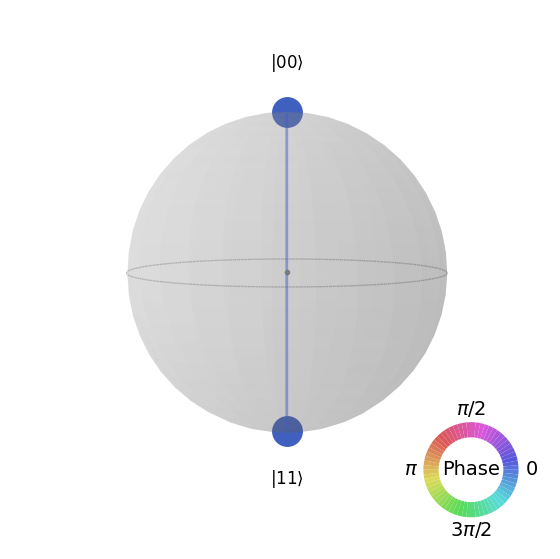

In [4]:
#CNOT GATE- conditional gate that performs X gate (flip gate) if test bit meets requirements
qe=QuantumCircuit(2)
qe.h(0)
# Cnot gate
qe.cx(0,1)    #so here you can see that the TEST bit is the first qubit and TARGET bit is the second qubit
qe.draw()

# Use Aer simulator backend
usim = Aer.get_backend('aer_simulator')
qe.save_statevector()
# Transpile the circuit for the simulator
transpiled_q = transpile(qe, usim)

# Run the circuit on the unitary simulator backend
job_sim = usim.run(transpiled_q)
result_sim = job_sim.result()

# result
final_state = result_sim.get_statevector(transpiled_q)

# Display the statevector
array_to_latex(final_state, prefix="\\text{Statevector = }")  # this will create an entangled state !
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(final_state)
